In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
df=pd.read_csv('C:/Users/adity/Desktop/Project/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

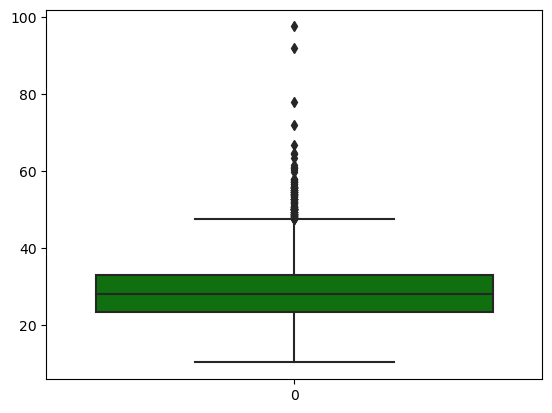

In [7]:
sns.boxplot(df['bmi'],color='green')

In [8]:
df['bmi'].mean()

28.893236911794666

In [9]:
df['bmi'].median()

28.1

In [10]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
df = pd.get_dummies(df, columns=['gender'], prefix='gender')

In [14]:
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,1,0,0
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,0
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,0
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0,0


In [15]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['ever_married']=df['ever_married'].map({'Yes':1,'No':0})

In [17]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
df = pd.get_dummies(df, columns=['work_type'], prefix='work_type')

In [19]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [20]:
df['Residence_type']=df['Residence_type'].map({'Urban':1,'Rural':0})

In [21]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
df = pd.get_dummies(df, columns=['smoking_status'], prefix='smoking_status')

In [23]:
df.drop('id',axis=1,inplace=True)

In [24]:
y=df.iloc[:,7]

In [25]:
cols = [col for col in df.columns if col != 'stroke']  
x = df[cols]

In [26]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female',
       'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [27]:
x

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.1,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,1,125.20,40.0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.6,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.6,0,1,0,0,0,1,0,0,0,1,0,0


In [28]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [29]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from imblearn.over_sampling import SMOTE  #smote is a function used to resample
smote = SMOTE(random_state=486)
x_resampled, y_resampled = smote.fit_resample(x, y)  #resampling with imblearn 

In [45]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=1221)           #used this library to import ML models

In [46]:
from sklearn.preprocessing import StandardScaler          #to get all values to mean 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'x_train After Scaling')

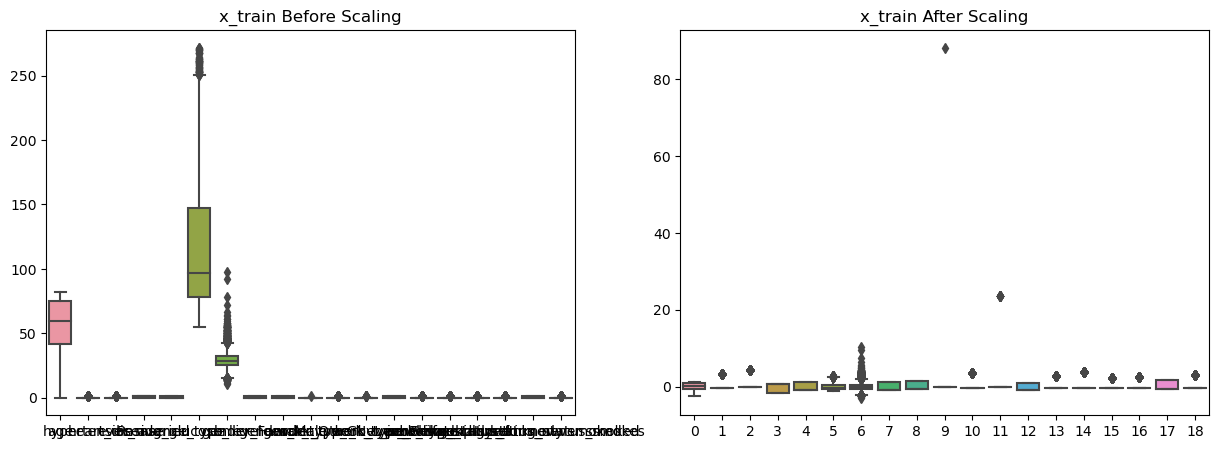

In [47]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train After Scaling')

In [48]:
from sklearn.linear_model import LogisticRegression         #using linear model we imported logistics regression
classification=LogisticRegression(max_iter=2000)            #we load the data in some variable
classification.fit(x_train_scaled,y_train)                  #for training ML model
y_pred=classification.predict(x_test_scaled)                #for prediction of our output 

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report        #metrics
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[988  13]
 [ 84 860]]
0.9501285347043702
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1001
           1       0.99      0.91      0.95       944

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [1, 5, 10, 20, 30]
}

In [51]:
classifier=LogisticRegression()
clf=GridSearchCV(classifier,param_grid=parameters,cv=5)

In [52]:
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 20, 30],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [53]:
clf.best_params_
clf.best_score_

0.9459942634672134

In [54]:
clf.best_params_

{'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}

In [55]:
classifier=LogisticRegression(C= 20, penalty= 'l2', solver='liblinear')

In [56]:
classifier.fit(x_train_scaled,y_train)
y_pred=classifier.predict(x_test_scaled)

In [57]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[988  13]
 [ 83 861]]
0.950642673521851
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1001
           1       0.99      0.91      0.95       944

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945

